#### Sec 1. Import Libraries

In [33]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json # for saving a file
import nltk
import re

#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from recipe_scrapers import scrape_me

####  Sec 2. Insert ( _ ) for Multiple Word Ingredients

In [566]:
# Open the Unprocessed Recipe List
with open('rawRecipeLists.txt', 'r') as f:
    rawRecipeLists = json.loads(f.read())
# Open the ingredient dictionary
with open('ingrDict.txt', 'r') as f:
    ingrRepDict = json.loads(f.read())
ingrKeys = list(ingrRepDict.keys())

for i in range(0, len(rawRecipeLists)): # Looping the recipes
    for x in range(0, len(ingrKeys)):
        lineList = []
        for y in range(0, len(rawRecipeLists[i][1])): # Looping the ingredients
            lineList.append(re.sub(ingrKeys[x], ingrRepDict[ingrKeys[x]], rawRecipeLists[i][1][y]))
        rawRecipeLists[i][1] = lineList # Update the list

In [567]:
# Save the rawRecipeLists into a file called parsedRawRecipeLists.txt
with open('parsedRawRecipeLists.txt', 'w') as f:
    f.write(json.dumps(rawRecipeLists))

In [25]:
# Open the parsedRawRecipeLists.txt file
with open('parsedRawRecipeLists.txt', 'r') as f:
    parsedRawRecipeLists = json.loads(f.read())
parsedRawRecipeLists

[['Hyderabadi Biryani',
  ['2 pounds boned leg of lamb, cut into 0.75-inch cubes',
   '1 tablespoons papaya_paste (tenderizing agent)',
   '2 tablespoons ginger',
   '2 tablespoons garlic_paste',
   '1 teaspoon salt',
   '2 teaspoons turmeric',
   '2 teaspoons chilli',
   '1 cinnamon_stick',
   '2 cloves',
   '10 cardamom_pods with shell',
   'Refined peanut oil or sunflower oil, for frying',
   '1 large white onion thinly sliced',
   '5 tablespoons whole yogurt',
   '2 lemons, juiced',
   '0.25 cup chopped mint',
   '0.25 cup chopped cilantro',
   '2 chilli, finely chopped',
   '3 tablespoons ghee or oil',
   '3 cups basmati rice',
   '1 teaspoon saffron (or 10 threads fresh saffron) boiled in 1-cup milk for 5 minutes',
   'Nan, 1 piece per person',
   'Salad, as an accompaniment']],
 ['Yogurt Marinated Lamb with Tri-Masala and Basmati Rice (Hyderabadi Biryani)',
  ['1 pound lamb, cut into 1-inch cubes',
   '1 pint plain yogurt',
   '4 teaspoons ghee or clarified butter',
   '3 cloves

#### Sec 3. Create Custom Tagger

In [26]:
# Open all dictionary files
with open('ingrTagDict.txt', 'r') as f:
    ingrTagDict = json.loads(f.read())
with open('cardTagDict.txt', 'r') as f:
    cardTagDict = json.loads(f.read())
with open('unitTagDict.txt', 'r') as f:
    unitTagDict = json.loads(f.read())
# Combine all dictiories into a single dictionary    
tagDict = {}
tagDict.update(ingrTagDict)
tagDict.update(cardTagDict)
tagDict.update(unitTagDict)
tagDict

{'fish_sauce': 'INGR',
 'garam_masala': 'INGR',
 'cardamom_pods': 'INGR',
 'fenugreek_seeds': 'INGR',
 'light_cream': 'INGR',
 'heavy_cream': 'INGR',
 'chili_powder': 'INGR',
 'chili_paste': 'INGR',
 'shrimp paste': 'INGR',
 'cayenne_pepper': 'INGR',
 'sugar': 'INGR',
 'brown_sugar': 'INGR',
 'soy_sauce': 'INGR',
 'lemongrass': 'INGR',
 'ginger': 'INGR',
 'paprika': 'INGR',
 'turmeric': 'INGR',
 'cumin': 'INGR',
 'coriander': 'INGR',
 'black_pepper': 'INGR',
 'lime_juice': 'INGR',
 'thai_basil': 'INGR',
 'galangal': 'INGR',
 'garlic': 'INGR',
 'shallots': 'INGR',
 'onion': 'INGR',
 'chilli': 'INGR',
 'yogurt': 'INGR',
 'chicken_stock': 'INGR',
 'shrimp_paste': 'INGR',
 'tomyam_paste': 'INGR',
 'butter': 'INGR',
 'kosher_salt': 'INGR',
 'coconut_cream': 'INGR',
 'papaya_paste': 'INGR',
 'garlic_paste': 'INGR',
 'mint': 'INGR',
 'fennel_seeds': 'INGR',
 'poppy_seeds': 'INGR',
 'mayonnaise': 'INGR',
 'curry_paste': 'INGR',
 'curry_powder': 'INGR',
 'ketchup': 'INGR',
 'mustard': 'INGR',
 

In [27]:
# Create the custom tagger
customTagger = nltk.UnigramTagger(model=tagDict)

#### Sec 4. Apply Tagging and Reorganize the Ingredient List

In [29]:
# Open the dictionary file to be used at the end of this code block
with open('unitConvDict.txt', 'r') as f:
    unitConvDict = json.loads(f.read())

taggedRecpList = []
for i in range(0, len(parsedRawRecipeLists)): # Lopping the recipes
    taggedIngrList = [] # Reset the ingredient list
    for y in range(0, len(parsedRawRecipeLists[i][1])): # Looping the ingredients
        #print(parsedRawRecipeLists[i][1][y])
        tagIngr = customTagger.tag(parsedRawRecipeLists[i][1][y].split(' ')) # Tagging
        tempList1 = []
        # Remove untagged words
        for x in range(0, len(tagIngr)):
            if tagIngr[x][1] == 'CARD':
                tempList1.append(tagIngr[x])
            elif tagIngr[x][1] == 'UNIT':
                tempList1.append(tagIngr[x])
            elif tagIngr[x][1] == 'INGR':
                tempList1.append(tagIngr[x])
            else:
                pass
        if tempList1:
            #print(tempList1)
            # Remove any ingredients that does not have INGR tag (1 sentence of ingredient)
            for z in tempList1:
                if z[1] == 'INGR':
                    taggedIngrList.append(tempList1) # Create multiple lines of ingredient
                else:
                    pass
    # Convert the cardinals and units to levels
    newIngr = []
    for recipeLevel in taggedIngrList: # Recipe level
        if recipeLevel[0][1] == 'CARD' and recipeLevel[1][1] == 'UNIT':
            combCardUnit = recipeLevel[0][0] + ' ' + recipeLevel[1][0]
            #print(combCardUnit + ' ' + recipeLevel[2][0])
            convUnitIngr = unitConvDict.get(combCardUnit) + recipeLevel[2][0]
            newIngr.append(convUnitIngr)
    taggedRecpList.append(newIngr)
#taggedRecpList

# Create a final recipe list with title and updated ingredient columns
finalRecipeLists = parsedRawRecipeLists.copy()
for i in range(0, len(finalRecipeLists)):
    finalRecipeLists[i][1] = taggedRecpList[i]
finalRecipeLists

[['Hyderabadi Biryani',
  ['lo_papaya_paste',
   'lo_ginger',
   'lo_garlic_paste',
   'lo_turmeric',
   'lo_chilli',
   'lo_yogurt',
   'sao_mint']],
 ['Yogurt Marinated Lamb with Tri-Masala and Basmati Rice (Hyderabadi Biryani)',
  ['lo_butter',
   'sao_mint',
   'lo_butter',
   'mao_cumin',
   'lo_coriander',
   'lo_fennel_seeds',
   'lo_poppy_seeds',
   'sao_yogurt']],
 ["Mrs. Ayyer's Vegetable Biryani with Tempered Onion-Cucumber Raita",
  ['sao_mustard',
   'mao_yogurt',
   'lo_lime_juice',
   'mao_cumin',
   'sao_garam_masala']],
 ['Biryani Burger with Mango Salsa and Yogurt Sauce in Grilled Naan Pockets',
  ['sao_yogurt',
   'lo_kosher_salt',
   'lo_yogurt',
   'lo_mayonnaise',
   'sao_garlic',
   'lo_curry_paste']],
 ['Chicken Korma', ['sao_onion', 'mao_ginger']],
 ['Goan Beef Curry with Vinegar: Beef Vindaloo',
  ['mao_cumin', 'mao_turmeric', 'lo_paprika']],
 ['Slow-Cooker Beef Curry', ['lo_curry_powder', 'mao_cumin', 'lo_ginger']],
 ['Malaysian Indian Curry-Spiced Beef Burge

##### Save the finalRecipeLists into a file called cleanedRecipeLists.txt

In [30]:
# Save it
with open('cleanedRecipeLists.txt.txt', 'w') as f:
    f.write(json.dumps(finalRecipeLists))

[['Hyderabadi Biryani',
  ['lo_papaya_paste',
   'lo_ginger',
   'lo_garlic_paste',
   'lo_turmeric',
   'lo_chilli',
   'lo_yogurt',
   'sao_mint']],
 ['Yogurt Marinated Lamb with Tri-Masala and Basmati Rice (Hyderabadi Biryani)',
  ['lo_butter',
   'sao_mint',
   'lo_butter',
   'mao_cumin',
   'lo_coriander',
   'lo_fennel_seeds',
   'lo_poppy_seeds',
   'sao_yogurt']],
 ["Mrs. Ayyer's Vegetable Biryani with Tempered Onion-Cucumber Raita",
  ['sao_mustard',
   'mao_yogurt',
   'lo_lime_juice',
   'mao_cumin',
   'sao_garam_masala']],
 ['Biryani Burger with Mango Salsa and Yogurt Sauce in Grilled Naan Pockets',
  ['sao_yogurt',
   'lo_kosher_salt',
   'lo_yogurt',
   'lo_mayonnaise',
   'sao_garlic',
   'lo_curry_paste']],
 ['Chicken Korma', ['sao_onion', 'mao_ginger']],
 ['Goan Beef Curry with Vinegar: Beef Vindaloo',
  ['mao_cumin', 'mao_turmeric', 'lo_paprika']],
 ['Slow-Cooker Beef Curry', ['lo_curry_powder', 'mao_cumin', 'lo_ginger']],
 ['Malaysian Indian Curry-Spiced Beef Burge

#### Sec 5. Final Text Pre-processing

In [128]:
# Reopen it again 
with open('cleanedRecipeLists.txt.txt', 'r') as f:
    cleanedRecipeLists = json.loads(f.read())
# And convert  it to Pandas datarame
recipeDF = pd.DataFrame(cleanedRecipeLists)

In [ ]:
# Change the column names
recipeDF.rename(columns = {0:'title'}, inplace = True)
recipeDF.rename(columns = {1:'ingredient'}, inplace = True)
recipeDF

In [132]:
# Convert column 1 from list to string
for i in range(0, len(recipeDF)):
    recipeDF['ingredient'].iloc[i] = ' '.join(recipeDF['ingredient'].iloc[i])

In [133]:
# Drop rows with missing ingredients
recipeDF['ingredient'].replace('', np.nan, inplace=True) # Change emptry string with NaN
drop_rows = list(recipeDF.loc[recipeDF['ingredient'].isna() == True].index)
recipeDF.drop(drop_rows, axis=0, inplace=True)
recipeDF = recipeDF.reset_index()
recipeDF.drop(['index'], axis=1, inplace=True)
recipeDF

,title,ingredient
0,Hyderabadi Biryani,lo_papaya_paste lo_ginger lo_garlic_paste lo_t...
1,Yogurt Marinated Lamb with Tri-Masala and Basm...,lo_butter sao_mint lo_butter mao_cumin lo_cori...
2,Mrs. Ayyer's Vegetable Biryani with Tempered O...,sao_mustard mao_yogurt lo_lime_juice mao_cumin...
3,Biryani Burger with Mango Salsa and Yogurt Sau...,sao_yogurt lo_kosher_salt lo_yogurt lo_mayonna...
4,Chicken Korma,sao_onion mao_ginger
5,Goan Beef Curry with Vinegar: Beef Vindaloo,mao_cumin mao_turmeric lo_paprika
6,Slow-Cooker Beef Curry,lo_curry_powder mao_cumin lo_ginger
7,Malaysian Indian Curry-Spiced Beef Burgers,mao_turmeric mao_coriander mao_cumin lo_ketchu...
8,Southern Indian Lamb Curry,lo_cumin lo_coriander lo_turmeric lo_ginger sa...
9,Rendang (Spicy Beef Indonesian Curry),lo_garlic lo_galangal mao_turmeric lo_nutmeg m...


In [134]:
# Create a function to remove repetitive words
def remove_repetitive_words(text):
    myword = ' '.join(dict.fromkeys(text.split()))
    return myword
# Remove repetitive words
recipeDF['ingredient'] = recipeDF.ingredient.apply(func=remove_repetitive_words)

#### Sec 6. Exploratory Text Data Analysis

In [135]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()

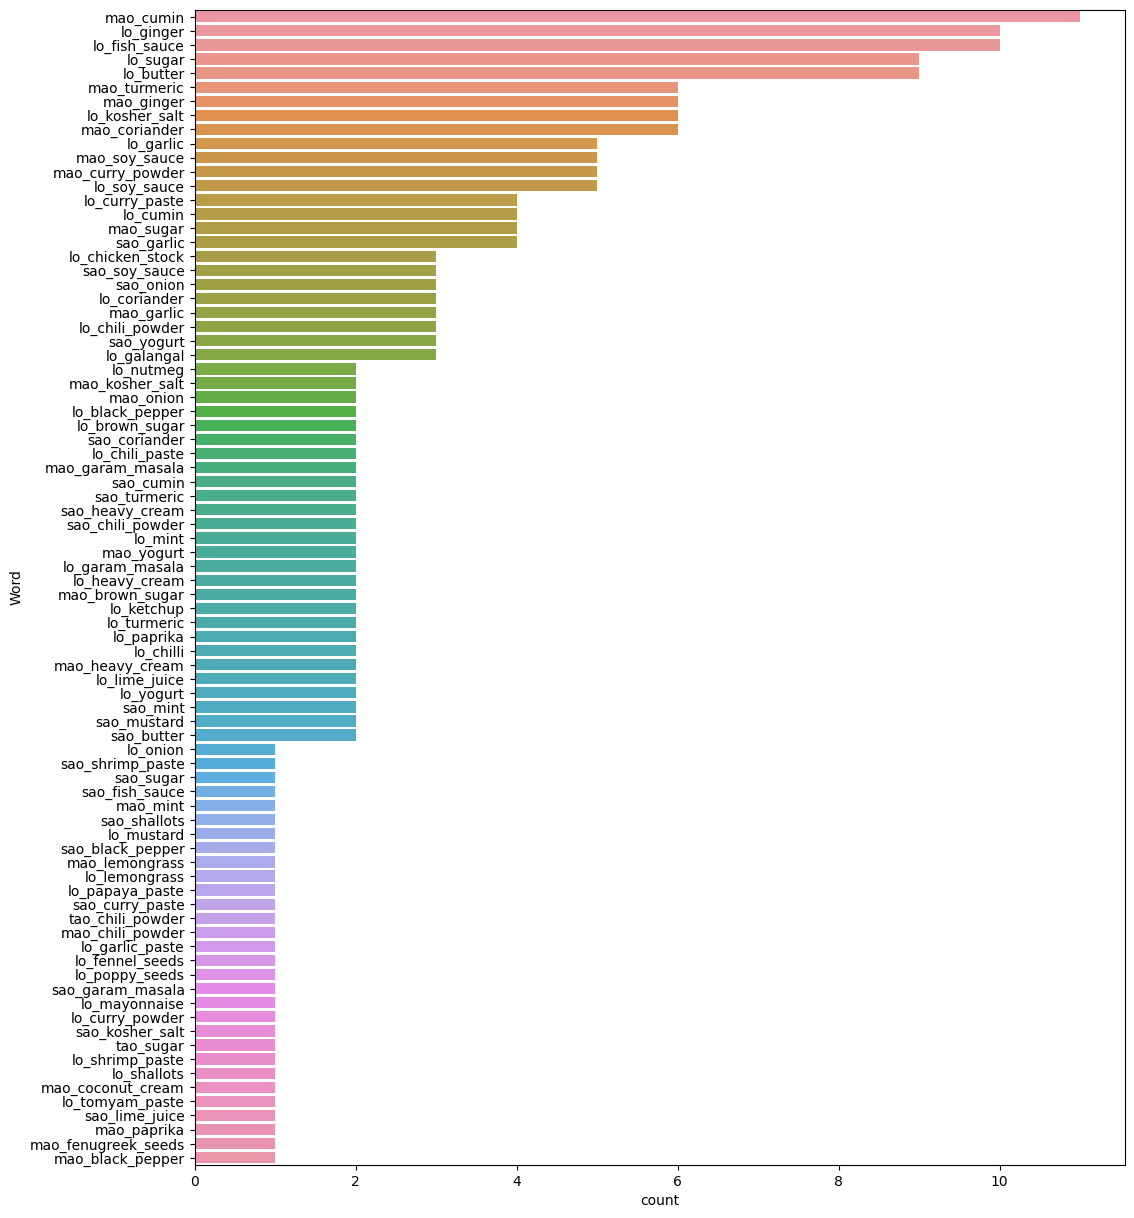

In [136]:
freq_words(recipeDF['ingredient'], 100)

#### Sec 7. Features Extraction

In [137]:
# Create a vectorizer model
tfidfModel = TfidfVectorizer(max_df=0.8, max_features=10000)
# Create TF-IDF features in form of the Document-Term Matrix
tfidfRecipe = tfidfModel.fit_transform(recipeDF['ingredient'])

In [209]:
# View the matrix
dtm = pd.DataFrame(tfidfRecipe.todense(), columns=tfidfModel.get_feature_names_out())
dtm

,lo_black_pepper,lo_brown_sugar,lo_butter,lo_chicken_stock,lo_chili_paste,lo_chili_powder,lo_chilli,lo_coriander,lo_cumin,lo_curry_paste,...,sao_mustard,sao_onion,sao_shallots,sao_shrimp_paste,sao_soy_sauce,sao_sugar,sao_turmeric,sao_yogurt,tao_chili_powder,tao_sugar
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.381178,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.279220,0.000000,0.000000,0.000000,0.000000,0.376528,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.376528,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.464728,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380546,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.406105,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.764889,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.309958,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.342745
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.468410,0.438930,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.468410,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


#### Sec 8. The Elbow Method to Find Optimal K

In [139]:
sumOfSquaredDistances = []
K = range(1, 50)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', random_state=1234)
    km = km.fit(tfidfRecipe)
    sumOfSquaredDistances.append(km.inertia_)

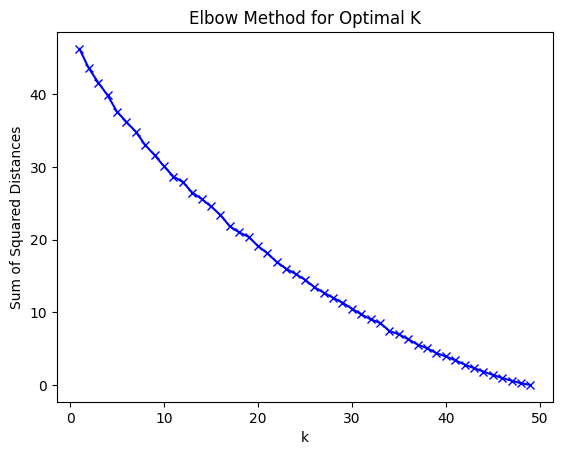

In [140]:
plt.plot(K, sumOfSquaredDistances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

#### Sec 9. Train a K-Means model

In [159]:
# Build a K-Means model
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, random_state=1234)
# Train the model
kmeans.fit(tfidfRecipe)

KMeans(n_clusters=7, random_state=1234)

In [160]:
identified_clusters = kmeans.fit_predict(tfidfRecipe)
identified_clusters

array([2, 6, 0, 0, 5, 4, 4, 4, 6, 5, 4, 1, 1, 1, 0, 0, 5, 2, 2, 3, 4, 5,
       4, 3, 5, 0, 6, 3, 6, 6, 2, 1, 1, 0, 1, 3, 3, 0, 1, 1, 4, 0, 6, 4,
       4, 1, 6, 6, 5, 6])

In [207]:
recipeClusterDF = recipeDF.copy()
# Attach a new column called cluster
recipeClusterDF['cluster'] = identified_clusters
# Sorting by column 'Country'
recipeClusterDF.sort_values(by=['cluster'], inplace=True)
recipeClusterDF

,title,ingredient,cluster
25,Lentil Soup,mao_onion lo_kosher_salt sao_coriander sao_cumin,0
15,The Best Butter Chicken,mao_yogurt lo_kosher_salt lo_ginger lo_butter ...,0
14,Instant Pot Butter Chicken,mao_ginger mao_garam_masala mao_paprika sao_cu...,0
41,Chilled Corn Soup,lo_brown_sugar,0
37,Shrimp Ramen,mao_soy_sauce,0
33,Thai Chicken Soup,lo_curry_paste,0
3,Biryani Burger with Mango Salsa and Yogurt Sau...,sao_yogurt lo_kosher_salt lo_yogurt lo_mayonna...,0
2,Mrs. Ayyer's Vegetable Biryani with Tempered O...,sao_mustard mao_yogurt lo_lime_juice mao_cumin...,0
32,Thai Curry Chicken Noodle Soup,sao_shallots lo_curry_paste mao_curry_powder s...,1
39,Quick Beef Pho,lo_fish_sauce lo_sugar,1


#### Sec 10. Visualization

In [162]:
pca = PCA(n_components=2, random_state=1234)
reducedFeatures = pca.fit_transform(tfidfRecipe.toarray())
reduceClusterCentres = pca.transform(kmeans.cluster_centers_)

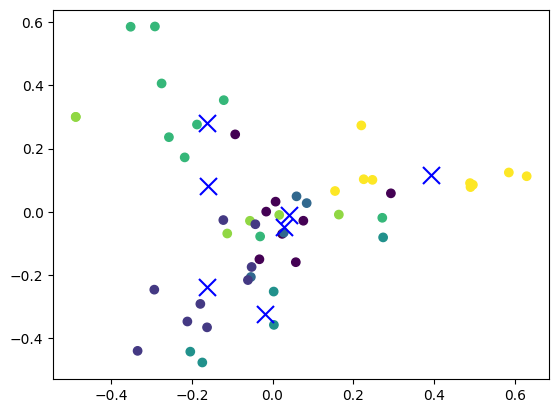

In [163]:
plt.scatter(reducedFeatures[:,0], reducedFeatures[:,1], c=kmeans.predict(tfidfRecipe))
plt.scatter(reduceClusterCentres[:,0], reduceClusterCentres[:,1], marker='x', s=150, c='b')

#### Sec 11. Evaluation 

##### Manual Inspection

In [170]:
# Select cluster 6 only
clusterSix = recipeClusterDF.loc[recipeClusterDF['cluster'] == 6]
clusterSix

,title,ingredient,cluster
28,Spicy Stewed Beef,lo_butter lo_cumin lo_chili_powder lo_kosher_s...,6
26,Spicy Bean Soup,sao_chili_powder lo_coriander lo_cumin,6
42,Spicy Corn Soup,lo_garlic lo_chili_powder sao_black_pepper lo_...,6
8,Southern Indian Lamb Curry,lo_cumin lo_coriander lo_turmeric lo_ginger sa...,6
1,Yogurt Marinated Lamb with Tri-Masala and Basm...,lo_butter sao_mint mao_cumin lo_coriander lo_f...,6
46,Shrimp and Corn Chowder,lo_butter,6
47,New England Clam Chowder,lo_butter mao_heavy_cream,6
29,Laila's Stewed Beef with Creamy Cheese Grits,lo_chili_powder lo_cumin lo_butter,6
49,Corn Chowder,lo_butter lo_heavy_cream,6


In [177]:
# Show cluster six only
for i in range(0, len(clusterSix)):
    print('Index:' + ' ' + str(clusterSix.index[i]))
    print('Title:' + ' ' + clusterSix.iloc[i][0])
    print('Ingr :' + ' ' + clusterSix.iloc[i][1])
    print('===')

Index: 28
Title: Spicy Stewed Beef
Ingr : lo_butter lo_cumin lo_chili_powder lo_kosher_salt lo_mustard lo_black_pepper
===
Index: 26
Title: Spicy Bean Soup
Ingr : sao_chili_powder lo_coriander lo_cumin
===
Index: 42
Title: Spicy Corn Soup
Ingr : lo_garlic lo_chili_powder sao_black_pepper lo_chicken_stock mao_heavy_cream
===
Index: 8
Title: Southern Indian Lamb Curry
Ingr : lo_cumin lo_coriander lo_turmeric lo_ginger sao_yogurt
===
Index: 1
Title: Yogurt Marinated Lamb with Tri-Masala and Basmati Rice (Hyderabadi Biryani)
Ingr : lo_butter sao_mint mao_cumin lo_coriander lo_fennel_seeds lo_poppy_seeds sao_yogurt
===
Index: 46
Title: Shrimp and Corn Chowder
Ingr : lo_butter
===
Index: 47
Title: New England Clam Chowder
Ingr : lo_butter mao_heavy_cream
===
Index: 29
Title: Laila's Stewed Beef with Creamy Cheese Grits
Ingr : lo_chili_powder lo_cumin lo_butter
===
Index: 49
Title: Corn Chowder
Ingr : lo_butter lo_heavy_cream
===


In [206]:
for i in range(0, len(clusterSix)):
    splittedIngr = clusterSix.iloc[i][1].split()
    for x in range(0, len(splittedIngr)):
        if splittedIngr[x] == 'mao_heavy_cream':
            print('Index:' + ' ' + str(clusterSix.index[i]))
            print('Title:' + ' ' + clusterSix.iloc[i][0])
            print('Ingr :' + ' ' + clusterSix.iloc[i][1])
    print('===')

===
===
Index: 42
Title: Spicy Corn Soup
Ingr : lo_garlic lo_chili_powder sao_black_pepper lo_chicken_stock mao_heavy_cream
===
===
===
===
Index: 47
Title: New England Clam Chowder
Ingr : lo_butter mao_heavy_cream
===
===
===


##### Use silhouette_score metric

In [169]:
from sklearn.metrics import silhouette_score
silhouette_score(tfidfRecipe, labels=kmeans.predict(tfidfRecipe))

0.05979255394151494